In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

marketdata=pd.read_csv('./marketing_data.csv')
marketdata.columns = marketdata.columns.str.replace(" ", "") ## this will remove any empty spaces.
marketdata.info()

##convert Income to float value
marketdata['Income'] = (
    marketdata['Income']
    .str.replace(r'[^0-9.\-]', '', regex=True)  # keep only digits, . and -
    .astype(float)
)
#convert DT_Customer data to datetime64 format
marketdata['Dt_Customer']=pd.to_datetime(marketdata['Dt_Customer'])
marketdata.info()
marketdata

marketdata.isna().sum() #before filling the na at income column

marketdata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

/tmp/ipykernel_4429/3465345521.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketdata['Dt_Customer']=pd.to_datetime(marketdata['Dt_Customer'])


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [2]:
#fill the income column na's with mean of similar simila education and Marital_status  

marketdata['Income'] = marketdata.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.median()) 
)
marketdata.isna().sum() #after filling the na's 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [3]:
##Create the new column of "age", "no_of_children","total_spending"
import datetime
now=datetime.datetime.today()
print(now)

marketdata['Age'] = marketdata['Year_Birth'].apply(lambda x: datetime.datetime.today().year - x)
marketdata['No_of_children'] = marketdata['Kidhome'] + marketdata['Teenhome']
marketdata['Total_spend'] = marketdata['MntWines']+marketdata['MntMeatProducts']+marketdata['MntFruits']+marketdata['MntFishProducts']+marketdata['MntSweetProducts']+marketdata['MntGoldProds']

marketdata


2025-09-25 09:53:46.072467


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,No_of_children,Total_spend
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,55,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,64,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,67,1,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,58,2,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,36,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,49,1,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,48,1,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,49,1,309
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,47,0,1383


In [4]:
#derive the total purchase

marketdata['Total_purchase']=marketdata['NumWebPurchases']+marketdata['NumDealsPurchases']+marketdata['NumStorePurchases']+marketdata['NumCatalogPurchases']
marketdata

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,No_of_children,Total_spend,Total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,55,0,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,64,0,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,67,1,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,58,2,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,36,1,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,49,1,689,20
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,48,1,55,5
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,49,1,309,14
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,47,0,1383,20


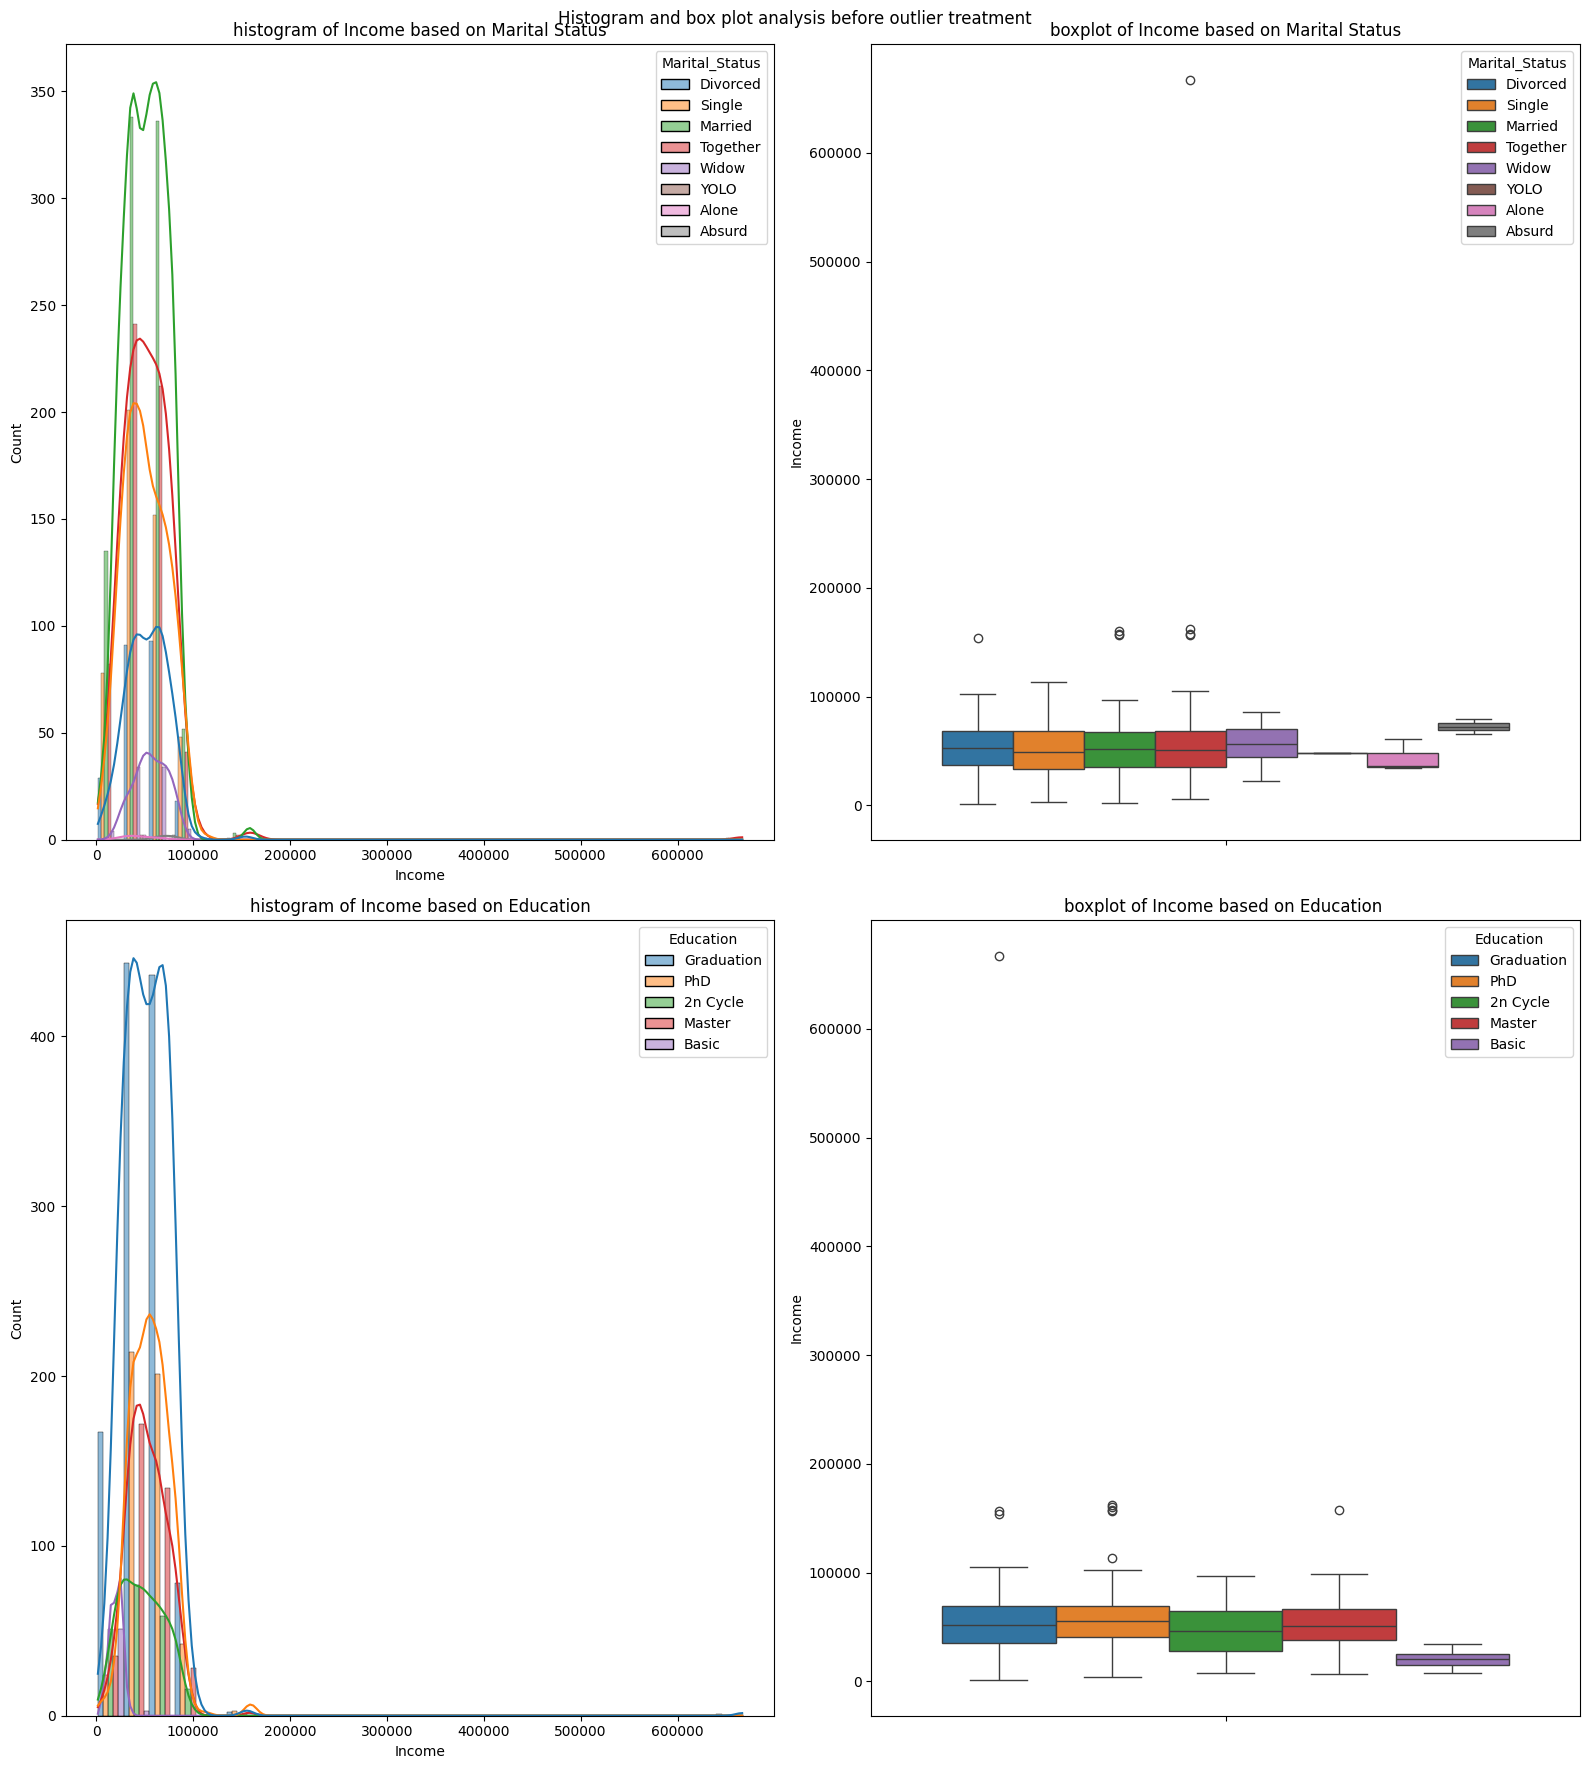

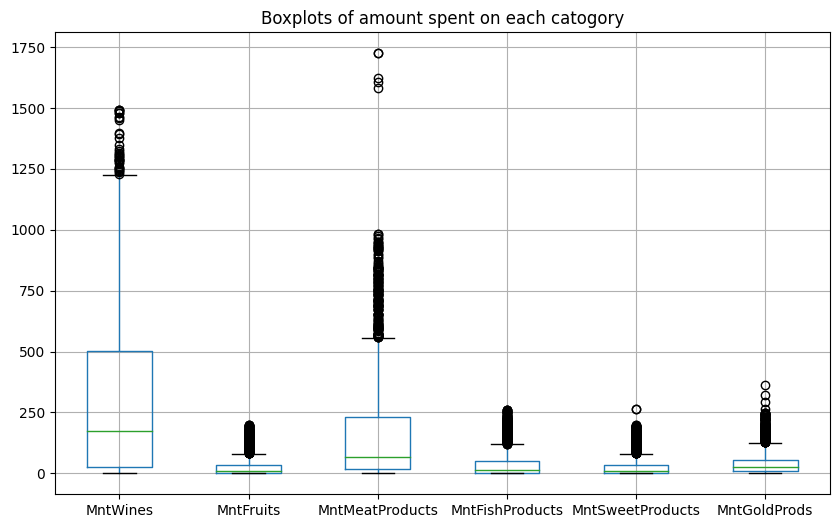

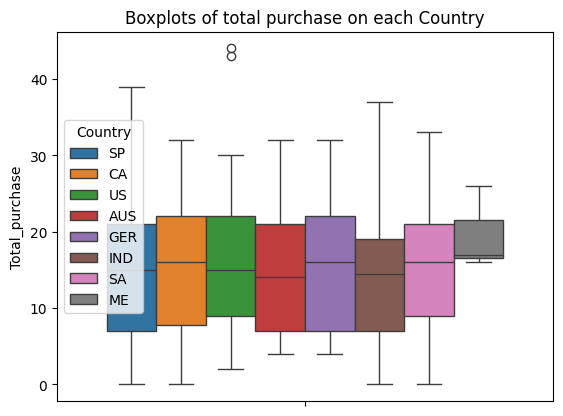

In [5]:

fig, axes = plt.subplots(2, 2, figsize=(16, 18))  # Adjust size as needed
axes = axes.flatten()  # Flatten into 1D array for easy indexing
plt.subplots_adjust(top=2.0)   # leave room at top
fig.suptitle("Histogram and box plot analysis before outlier treatment")



sns.histplot(data= marketdata, x='Income', hue='Marital_Status',multiple='dodge' ,kde=True, bins=25,ax=axes[0])
axes[0].set_title("histogram of Income based on Marital Status")

sns.boxplot(data=marketdata, y='Income', hue='Marital_Status',ax=axes[1])
axes[1].set_title("boxplot of Income based on Marital Status")

sns.histplot(data= marketdata, x='Income', hue='Education',multiple='dodge' ,kde=True, bins=25,ax=axes[2])
axes[2].set_title("histogram of Income based on Education")

sns.boxplot(data=marketdata, y='Income', hue='Education',ax=axes[3])
axes[3].set_title("boxplot of Income based on Education ")


plt.tight_layout()
plt.show()

marketdata[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']].boxplot(figsize=(10, 6))

plt.title("Boxplots of amount spent on each catogory")
plt.show()

sns.boxplot(data=marketdata, y='Total_purchase', hue='Country')
plt.title("Boxplots of total purchase on each Country")
plt.show()


In [6]:
### Handle outlier

Q1 = marketdata['Income'].quantile(0.25)
Q3 = marketdata['Income'].quantile(0.75)
IQR = Q3 - Q1 # Inter quantile range 

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
print('Lower Limit : ' , lb , ' Upper Limit : ', ub)

outlier=marketdata[(marketdata['Income'] < lb) | (marketdata['Income'] > ub)]
print(outlier)

###remove outlier

marketdata_removed_outlier = marketdata[(marketdata['Income'] > lb) & (marketdata['Income'] < ub)]

marketdata_removed_outlier

Lower Limit :  -13587.75  Upper Limit :  117416.25
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
325          0  2013-04-29       13         1  ...             0   
497          0  2012-08-04       21        55  ...             0   
527          0  2013-06-02       23         9  ...             0   
731          1  201

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,No_of_children,Total_spend,Total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,55,0,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,64,0,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,67,1,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,58,2,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,36,1,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,49,1,689,20
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,48,1,55,5
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,49,1,309,14
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,47,0,1383,20


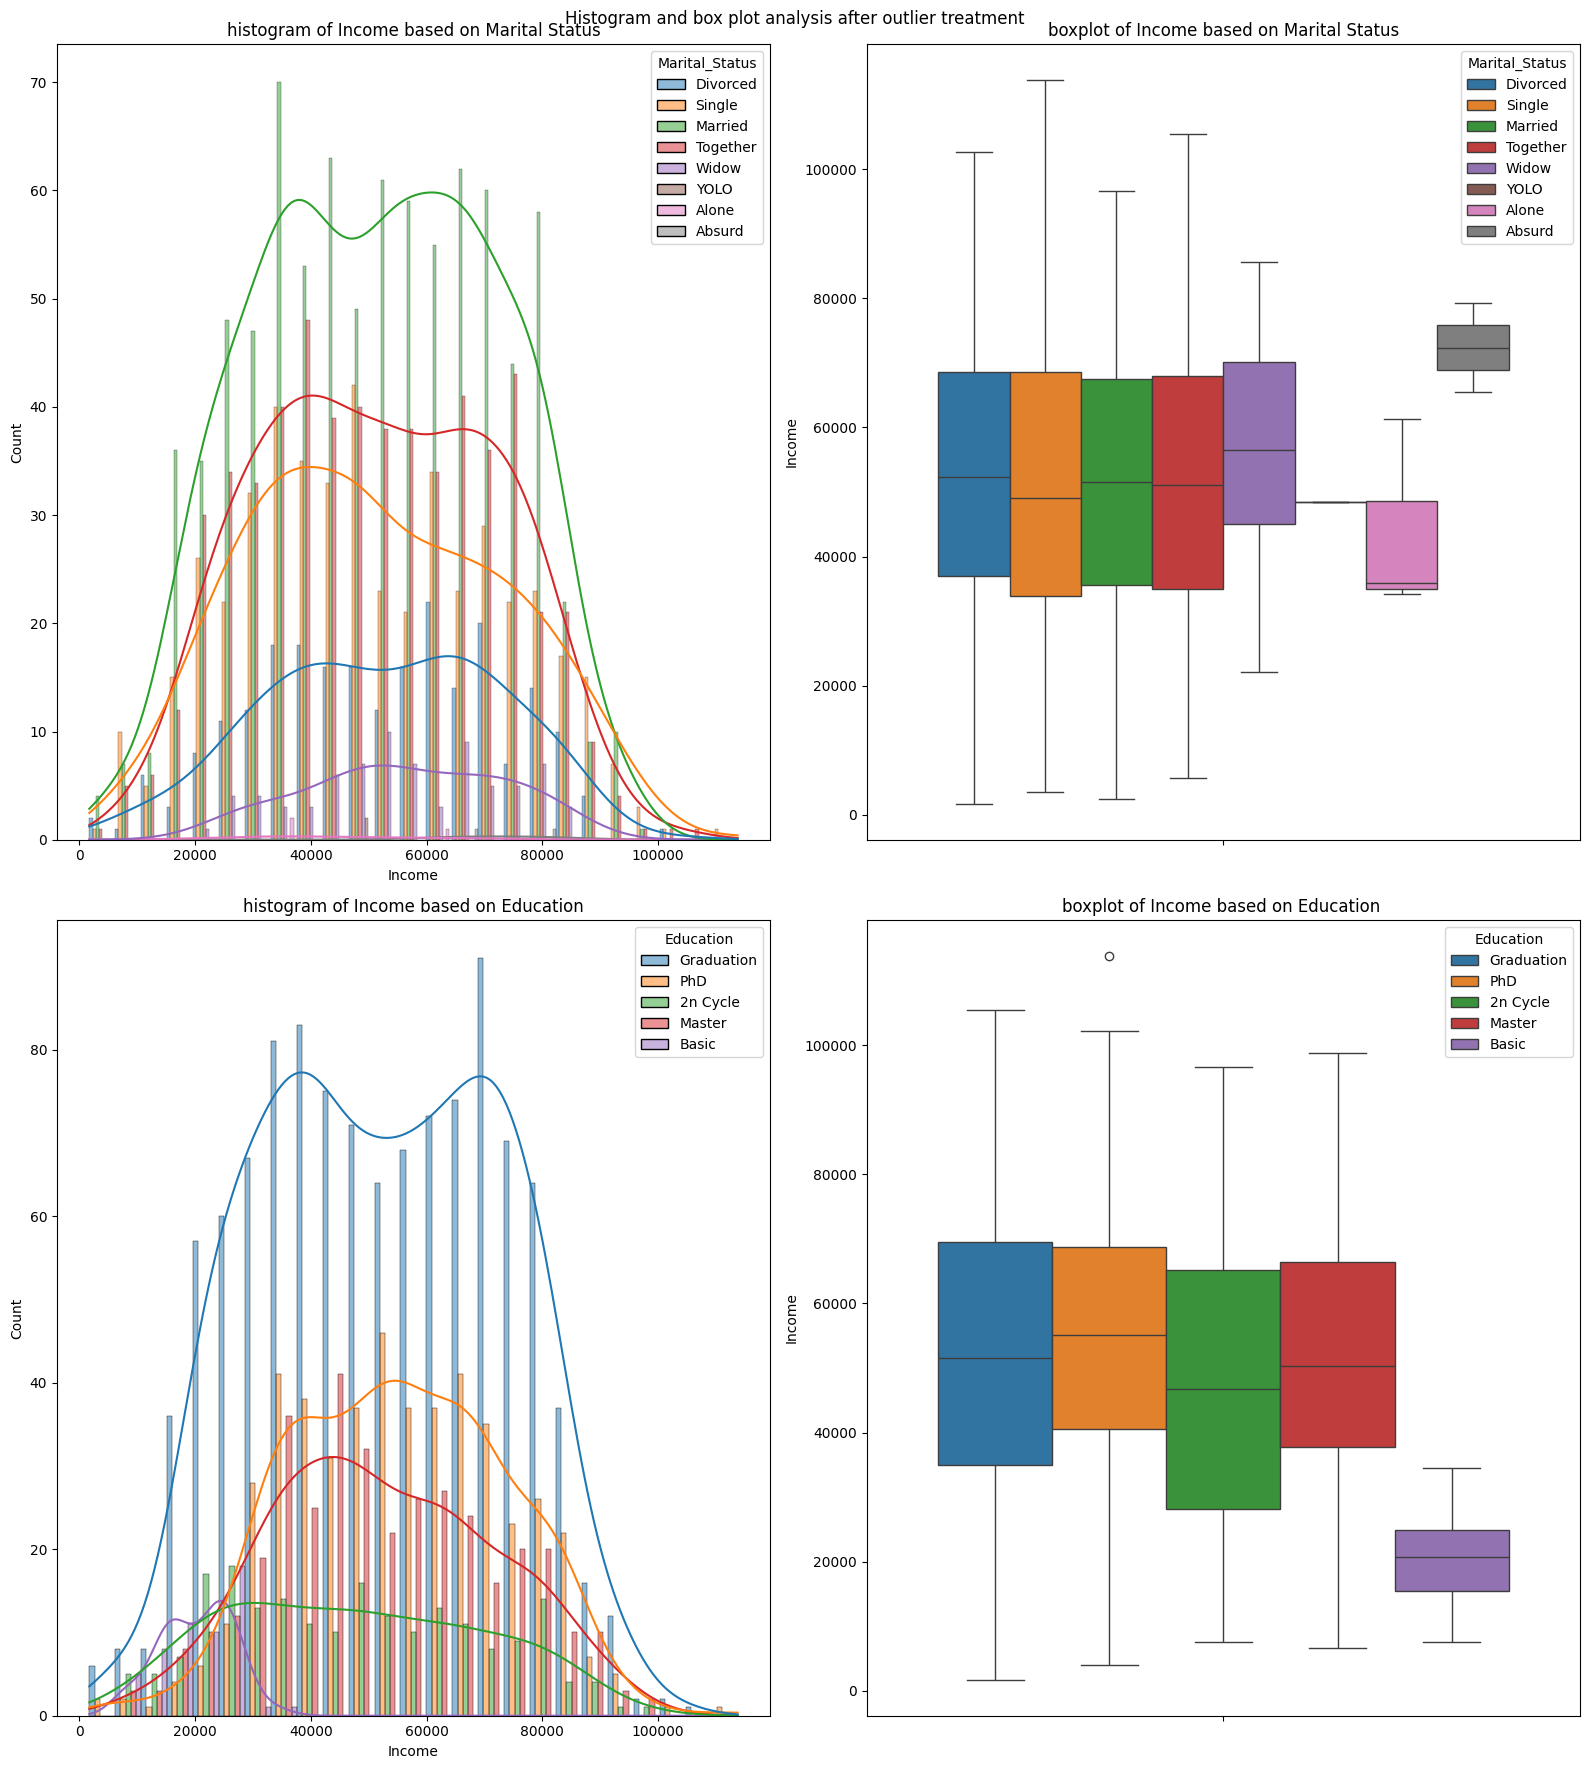

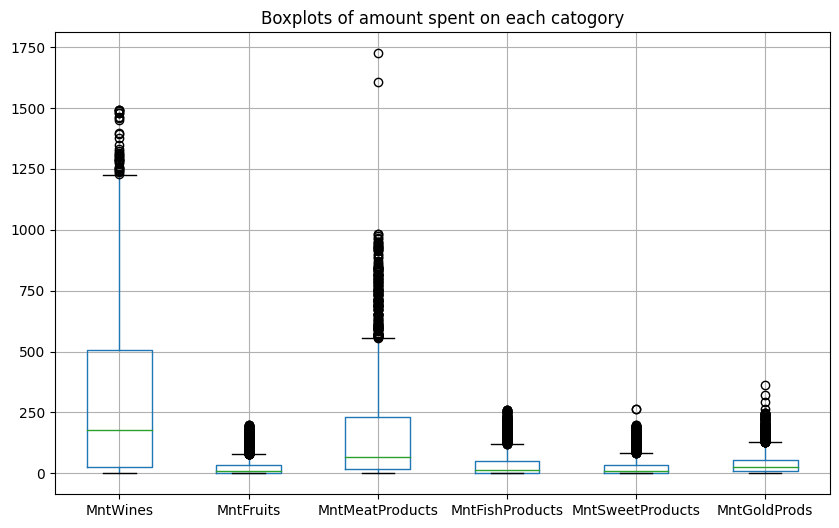

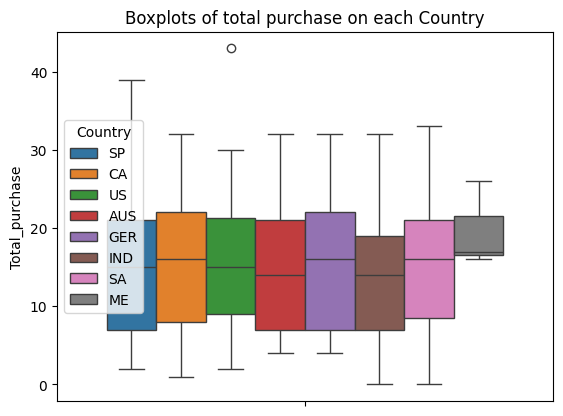

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 18))  # Adjust size as needed
axes = axes.flatten()  # Flatten into 1D array for easy indexing
plt.subplots_adjust(top=2.0)   # leave room at top
fig.suptitle("Histogram and box plot analysis after outlier treatment")



sns.histplot(data= marketdata_removed_outlier, x='Income', hue='Marital_Status',multiple='dodge' ,kde=True, bins=25,ax=axes[0])
axes[0].set_title("histogram of Income based on Marital Status")

sns.boxplot(data=marketdata_removed_outlier, y='Income', hue='Marital_Status',ax=axes[1])
axes[1].set_title("boxplot of Income based on Marital Status")

sns.histplot(data= marketdata_removed_outlier, x='Income', hue='Education',multiple='dodge' ,kde=True, bins=25,ax=axes[2])
axes[2].set_title("histogram of Income based on Education")

sns.boxplot(data=marketdata_removed_outlier, y='Income', hue='Education',ax=axes[3])
axes[3].set_title("boxplot of Income based on Education ")


plt.tight_layout()
plt.show()

marketdata_removed_outlier[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']].boxplot(figsize=(10, 6))

plt.title("Boxplots of amount spent on each catogory")
plt.show()

sns.boxplot(data=marketdata_removed_outlier, y='Total_purchase', hue='Country')
plt.title("Boxplots of total purchase on each Country")
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Education', 'Marital_Status', 'Country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_array=encoder.fit_transform(marketdata_removed_outlier[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=marketdata_removed_outlier.index)
marketdata_removed_outlier_encoded = pd.concat([marketdata_removed_outlier.drop(columns=categorical_cols), encoded_df], axis=1)

marketdata_removed_outlier_encoded

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-03-07,99,372,18,126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2237,22,1976,46310.0,1,0,2012-12-03,99,185,2,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


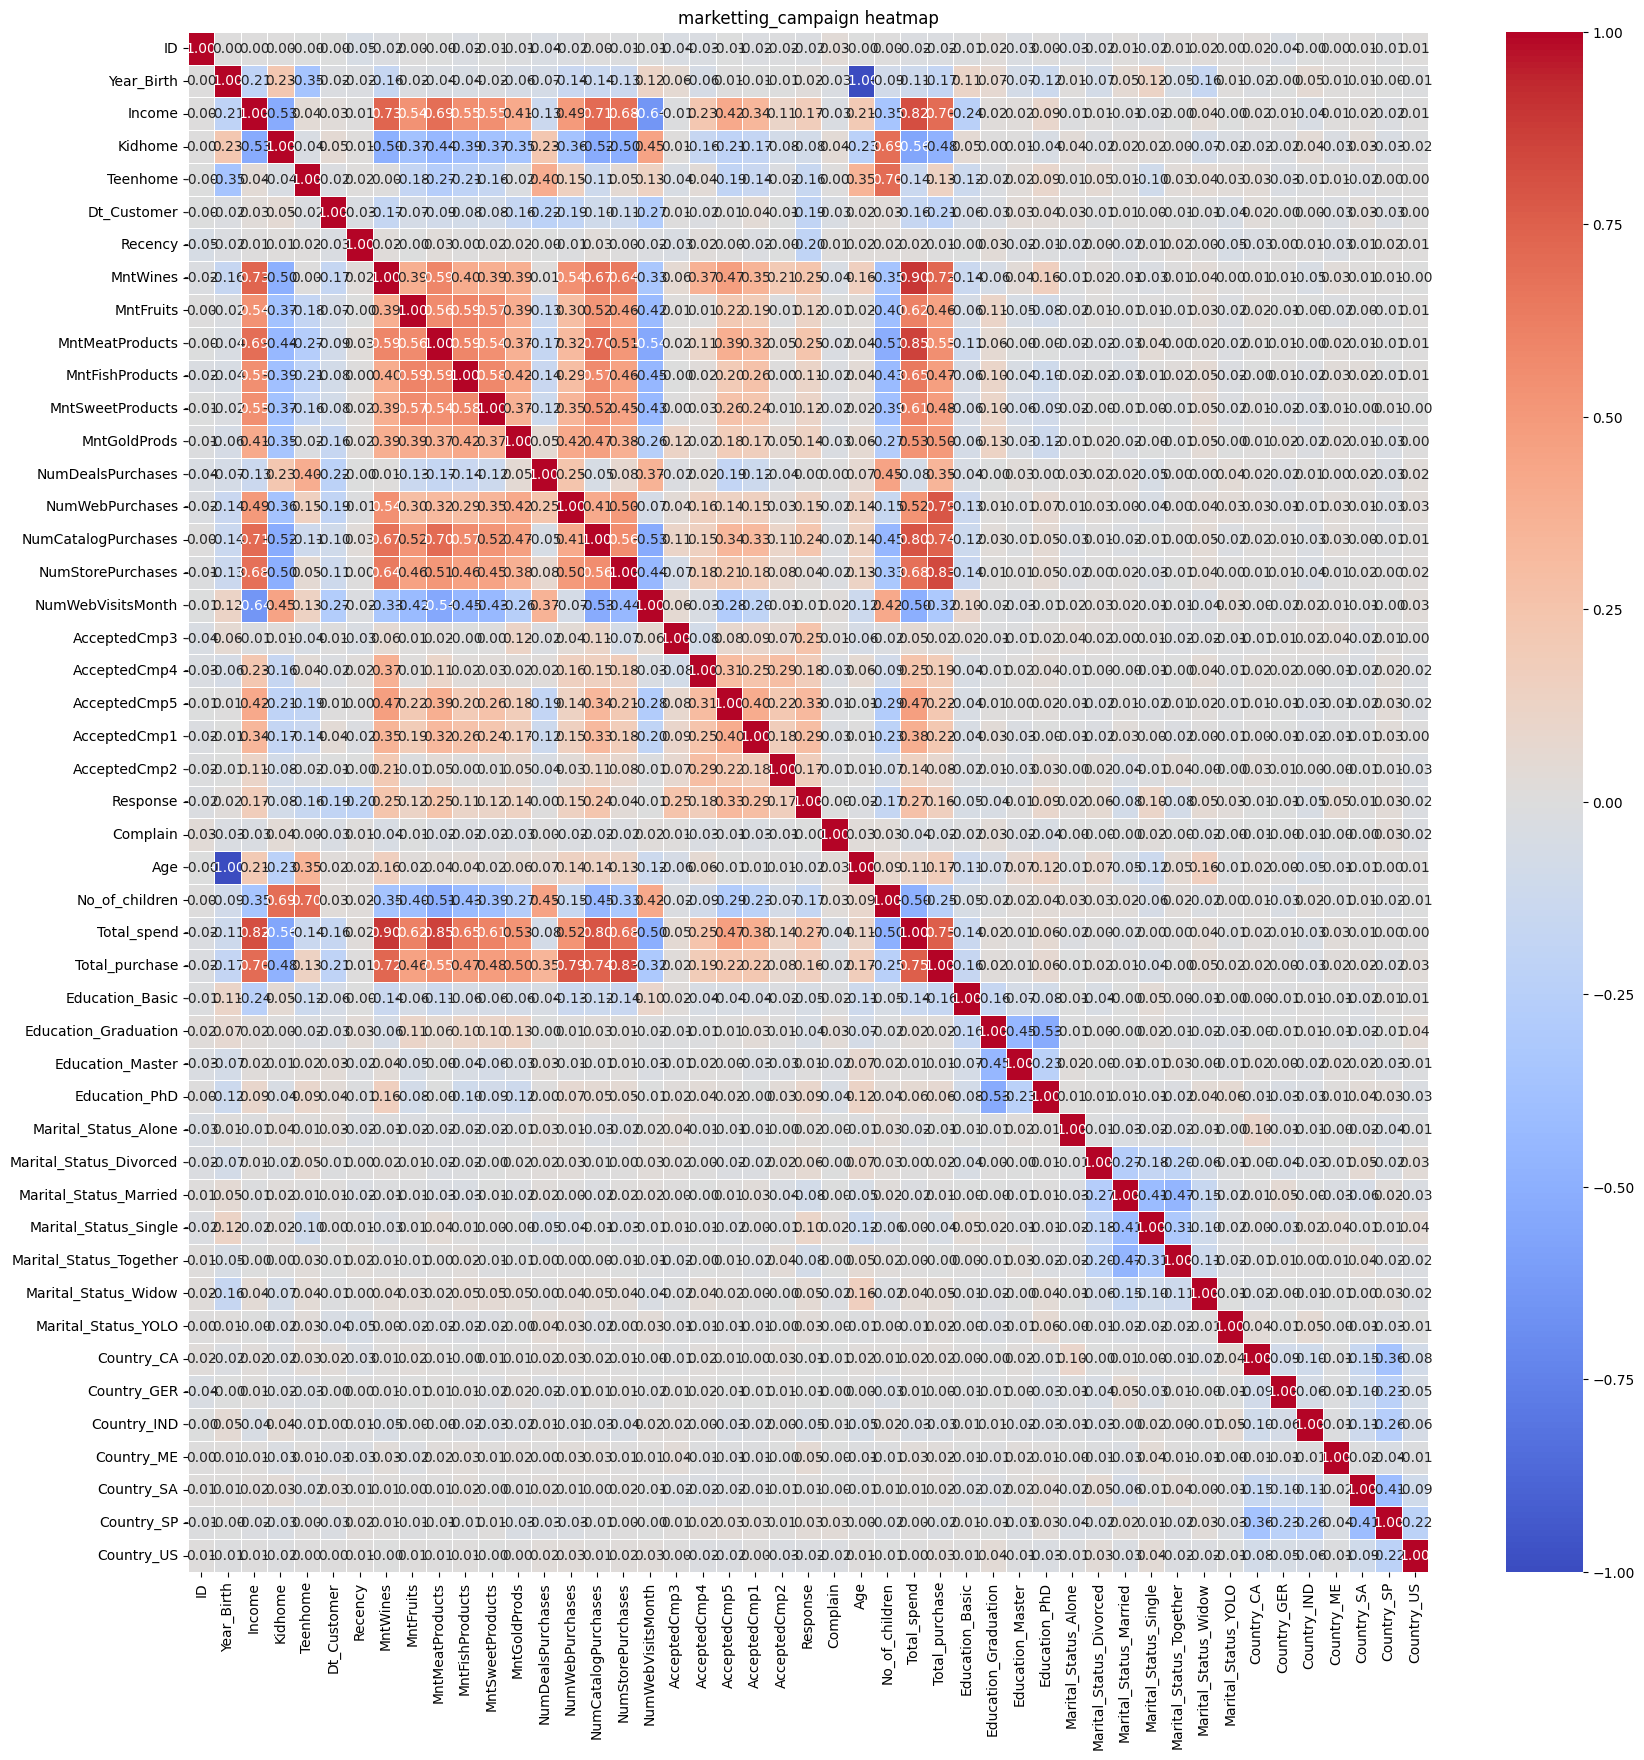

In [9]:
plt.figure(figsize=(20,20))
corr_matrix=marketdata_removed_outlier_encoded.corr()
corr_matrix
sns.heatmap(corr_matrix,
            annot=True,        # show values inside cells
            cmap="coolwarm",   # choose color scheme (Blues, viridis, magma, etc.)
            center=0,          # center the colormap (good for correlations)
            linewidths=0.5,    # grid lines between cells
            fmt=".2f")
plt.title('marketting_campaign heatmap')
plt.show()

Hypotheses Testing

In [10]:
###a.	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences

from scipy.stats import chi2_contingency

# Example: Assume df has columns: 'Age' and 'Channel'
# Step 1: Create age groups
bins = [0, 30, 50, 100]
labels = ['<30', '30-50', '50+']
marketdata_removed_outlier['AgeGroup'] = pd.cut(marketdata_removed_outlier['Age'], bins=bins, labels=labels)

# Step 2: Build contingency table
contingency = pd.crosstab(marketdata_removed_outlier['AgeGroup'], marketdata_removed_outlier['NumStorePurchases'])
print(contingency)

# Step 3: Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p_val)

if p_val<0.05:
    print("reject H₀ → Age and channel are dependent → evidence that older customers prefer in-store more than expected.")
else:
    print("fail to reject H₀ → no evidence of such preference.")

NumStorePurchases  0   1    2    3    4    5    6    7   8   9   10  11  12  \
AgeGroup                                                                      
<30                 0   0    3    1    0    0    0    0   1   0   0   0   2   
30-50               4   2   93  223  101   54   51   40  49  28  39  29  28   
50+                 7   2  125  265  221  158  127  103  99  78  86  52  75   

NumStorePurchases  13  
AgeGroup               
<30                 0  
30-50              25  
50+                58  
Chi2: 76.33227334055175 p-value: 7.612964725596613e-07
reject H₀ → Age and channel are dependent → evidence that older customers prefer in-store more than expected.


/tmp/ipykernel_4429/2992139411.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketdata_removed_outlier['AgeGroup'] = pd.cut(marketdata_removed_outlier['Age'], bins=bins, labels=labels)


In [27]:
###b.	Customers with children likely experience time constraints, making online shopping a more convenient option


ct=pd.crosstab(marketdata_removed_outlier['No_of_children'],marketdata_removed_outlier['NumWebPurchases'])
ct
pref_table = pd.DataFrame({
    "NoOnline": ct[0],
    "Online": ct.drop(columns=[0]).sum(axis=1)
})
print(pref_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pref_table)
print("Chi2:", chi2, "p-value:", p)

if p>=0.05:
    print("Fail to reject null hypoteses - 'Customers with children and customers without children have the same preference for online shopping' ")
else:
    print("Reject null hypotheses - Customers with children are more likely to prefer online shopping")

                NoOnline  Online
No_of_children                  
0                     14     620
1                     15    1110
2                     10     410
3                      4      49
Chi2: 11.682242984583404 p-value: 0.008554846025257218
Reject null hypotheses - Customers with children are more likely to prefer online shopping


                     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
NumDealsPurchases             1.000000         0.245189            -0.054045   
NumWebPurchases               0.245189         1.000000             0.411674   
NumCatalogPurchases          -0.054045         0.411674             1.000000   
NumStorePurchases             0.076264         0.499030             0.561571   

                     NumStorePurchases  
NumDealsPurchases             0.076264  
NumWebPurchases               0.499030  
NumCatalogPurchases           0.561571  
NumStorePurchases             1.000000  


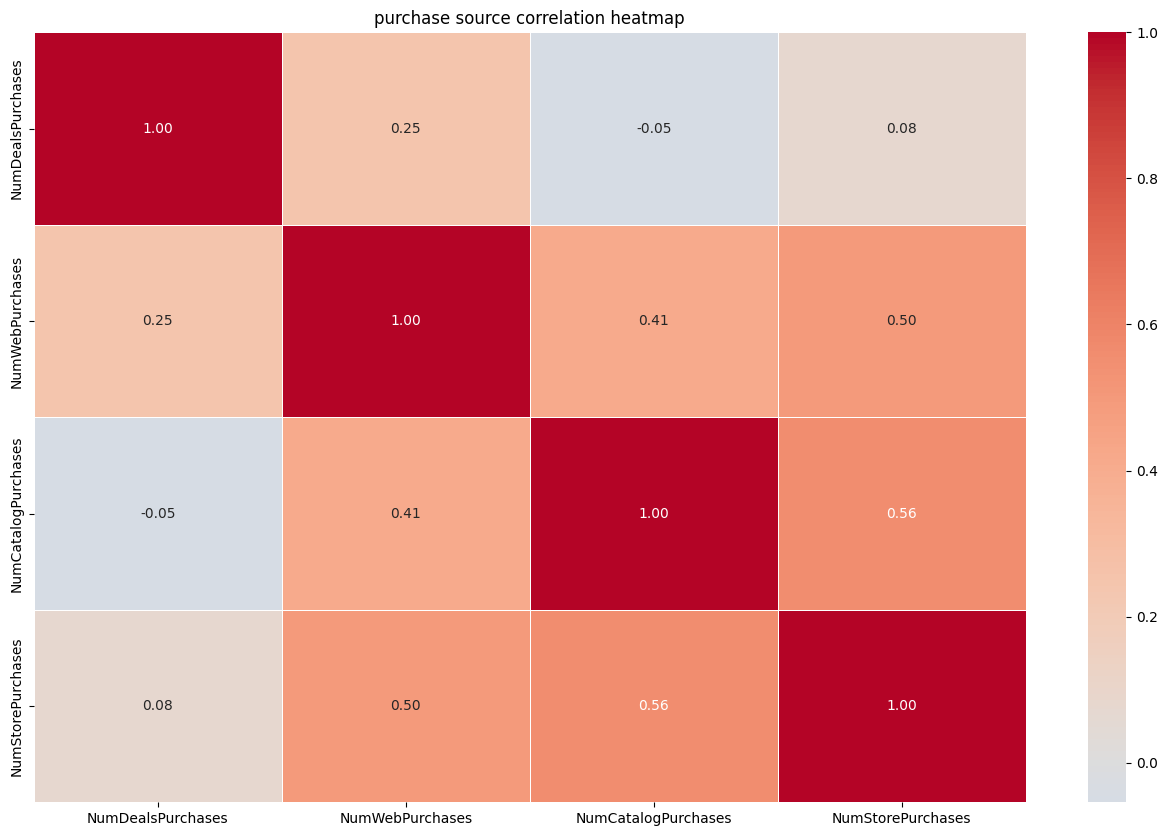

The corelation heat map pointing no negative corelation b/w NumWebPurchase with other sources which is pointing that there is no risk of cannibalization by alternative distribution channels 


In [12]:
###c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

plt.figure(figsize=(16,10))
corr_matrix_new=marketdata_removed_outlier_encoded[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].corr()
print(corr_matrix_new)
sns.heatmap(corr_matrix_new,
            annot=True,        # show values inside cells
            cmap="coolwarm",   # choose color scheme (Blues, viridis, magma, etc.)
            center=0,          # center the colormap (good for correlations)
            linewidths=0.5,    # grid lines between cells
            fmt=".2f")
plt.title('purchase source correlation heatmap')
plt.show()

print("The corelation heat map pointing no negative corelation b/w NumWebPurchase with other sources which is pointing that there is no risk of cannibalization by alternative distribution channels ")


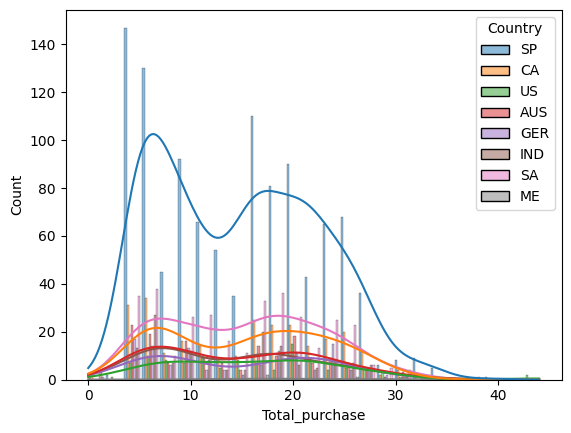

In [13]:
###d.	Does the United States significantly outperform the rest of the world in total purchase volumes


sns.histplot(data= marketdata, x='Total_purchase', hue='Country',multiple='dodge' ,kde=True, bins=25)
plt.show()

According to the above histogramplot, the data is not normally distributed.

In [14]:
from scipy.stats import mannwhitneyu

# Split data
us = marketdata_removed_outlier[marketdata_removed_outlier['Country'] == 'US']['Total_purchase']
non_us = marketdata_removed_outlier[marketdata_removed_outlier['Country'] != 'US']['Total_purchase']

# Mann-Whitney U test (one-tailed)
u_stat, p_val = mannwhitneyu(us, non_us, alternative='greater')

print("U-statistic:", u_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("reject H₀ → U.S. customers significantly outperform Rest of World")
else:
    print("fail to reject H₀ → no significant evidence of higher U.S. purchase")

U-statistic: 123893.5
p-value: 0.0794050128232548
fail to reject H₀ → no significant evidence of higher U.S. purchase


Visualization

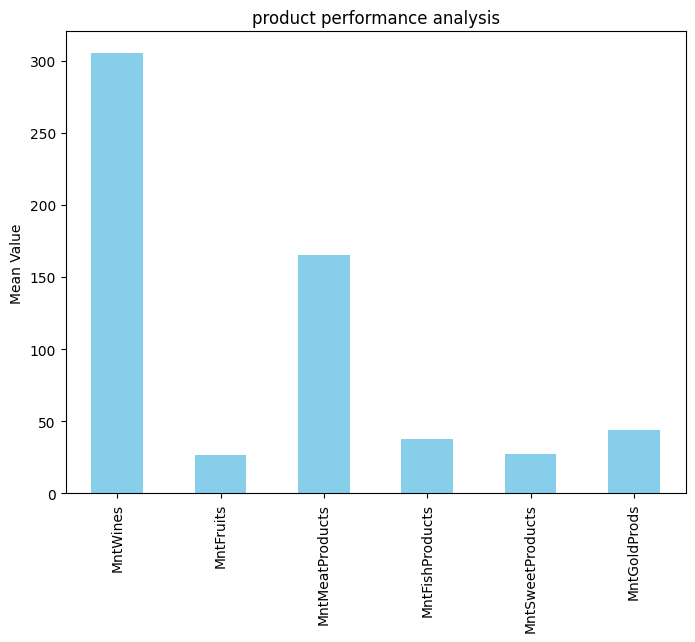

In [15]:
###a.	Identify the top-performing products and those with the lowest revenue
import matplotlib.pyplot as plt

cols = ['PurchaseAmount', 'Income', 'Age', 'WebVisits']

# Compute mean values
means = marketdata_removed_outlier[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean()

# Barplot
means.plot(kind="bar", figsize=(8,6), color="skyblue")
plt.ylabel("Mean Value")
plt.title("product performance analysis")
plt.show()


According to the visualization Wine is top performing and the Fruits and sweet productis are low performing

               Age  Response
Age       1.000000 -0.021822
Response -0.021822  1.000000


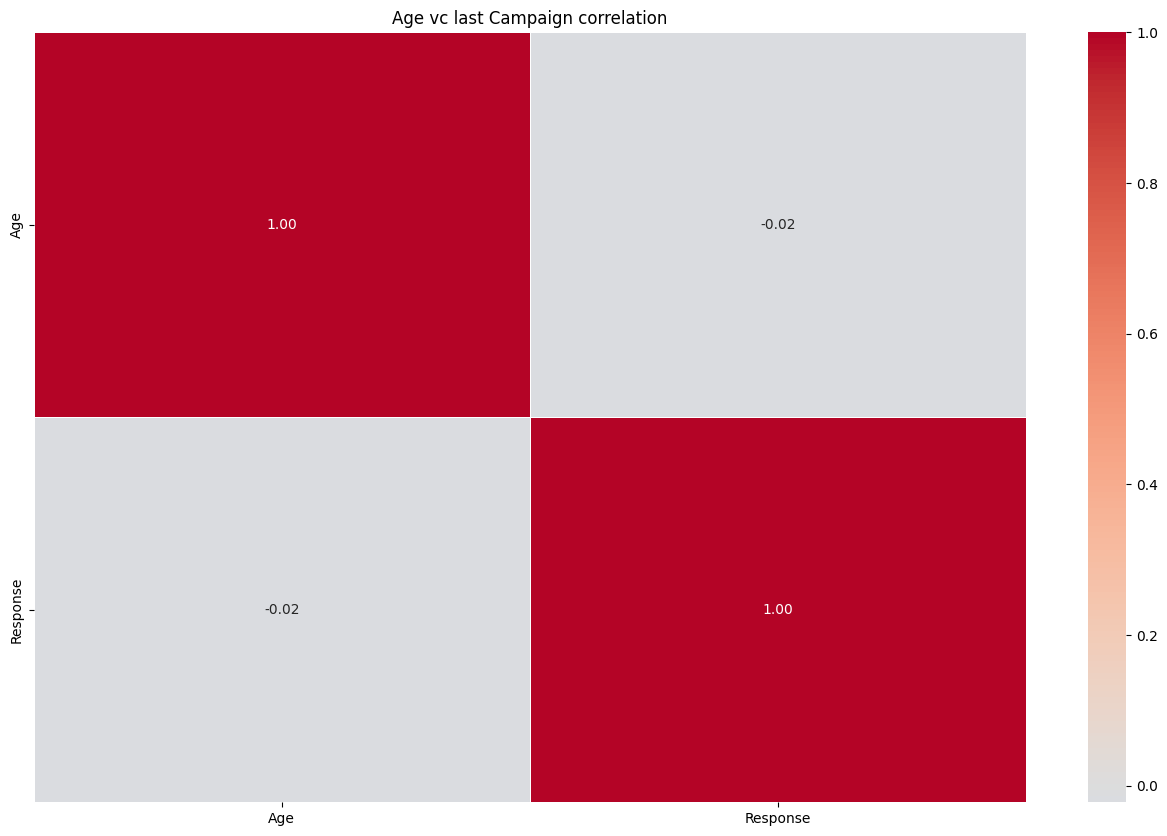

In [16]:
###b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.


plt.figure(figsize=(16,10))
corr_matrix_age_campaign=marketdata_removed_outlier[['Age','Response']].corr()
print(corr_matrix_age_campaign)
sns.heatmap(corr_matrix_age_campaign,
            annot=True,        # show values inside cells
            cmap="coolwarm",   # choose color scheme (Blues, viridis, magma, etc.)
            center=0,          # center the colormap (good for correlations)
            linewidths=0.5,    # grid lines between cells
            fmt=".2f")
plt.title('Age vc last Campaign correlation')
plt.show()


As the corelation value of Age vs Response(Last Campaign) reported negative value, there is no corelation

/tmp/ipykernel_4429/4292457458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


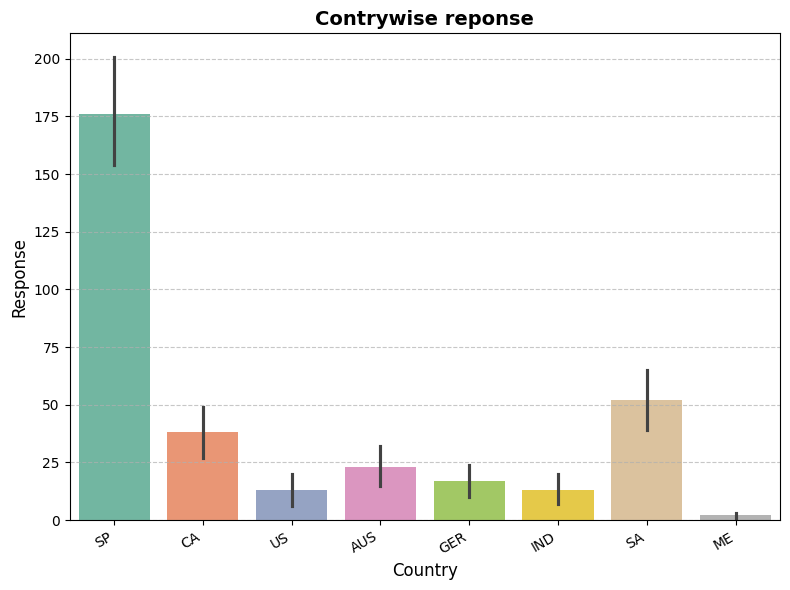

In [17]:
###c.	Determine the country with the highest number of customers who accepted the last campaign.


plt.figure(figsize=(8,6))
sns.barplot(
    data=marketdata_removed_outlier,
    x='Country',
    y='Response',
    estimator=sum,   # since 'Complain' looks like 0/1, sum gives counts
    palette="Set2"   # better colors
)

plt.title("Contrywise reponse", fontsize=14, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Response", fontsize=12)
plt.xticks(rotation=30, ha='right')  # tilt x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add gridlines for clarity
plt.tight_layout()
plt.show()

According to the above barplot SP is the highest number who accepted the last campaign

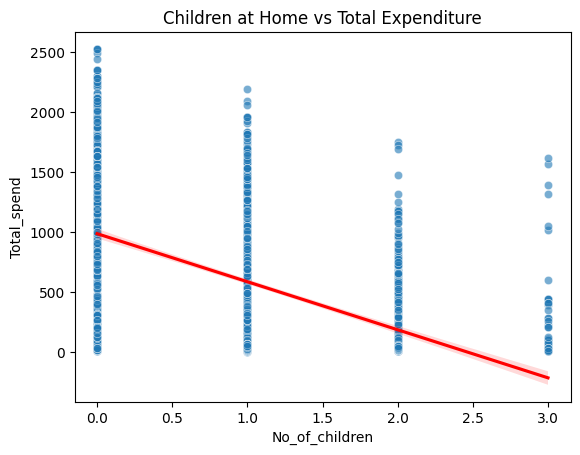

In [18]:
###d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

sns.scatterplot(x="No_of_children", y="Total_spend", data=marketdata_removed_outlier, alpha=0.6)
sns.regplot(x="No_of_children", y="Total_spend", data=marketdata_removed_outlier, scatter=False, color="red")
plt.title("Children at Home vs Total Expenditure")
plt.show()

According to the above plot the expendeture is less when the kids are more 

/tmp/ipykernel_4429/762176000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


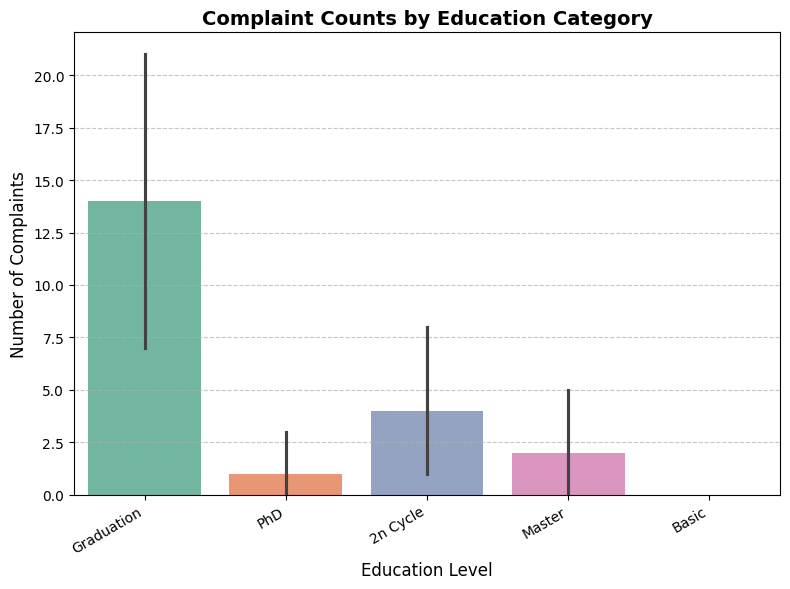

In [19]:
###e.	Analyze the educational background of customers who lodged complaints in the last two years.
plt.figure(figsize=(8,6))
sns.barplot(
    data=marketdata_removed_outlier,
    x='Education',
    y='Complain',
    estimator=sum,   # since 'Complain' looks like 0/1, sum gives counts
    palette="Set2"   # better colors
)

plt.title("Complaint Counts by Education Category", fontsize=14, fontweight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=30, ha='right')  # tilt x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add gridlines for clarity
plt.tight_layout()
plt.show()


People who is background of Graduation have lodged more complain then others